<a href="https://colab.research.google.com/github/Tamanna5-verma/CodeClause_Loan-Prediciton/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TOPIC:
LOAN PREDICTION
THIS TASK IS DONE AS PART OF DATA SCIENCE INTERN AT **CODECLAUSE**

STEPS INVLOVED IN LAOAN PREDICTION
* IMPORTING THE REQUIRED LIBRARIES
* UNDERSTANDING THE DATASET
*  DATA VISUALIZATION
* MODEL BUILDING
* PREDICTING ACCURACY

STEP 1: IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.simplefilter("ignore")


STEP 2: UNDERSTANDING THE DATASET

In [2]:
test = pd.read_csv('/content/test_data.csv')
train = pd.read_csv('/content/train_data.csv')
df = pd.concat([train, test])
df.reset_index(drop = True, inplace = True)
print(df.shape)
df.head()

(981, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [4]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [7]:
df.Loan_Status = np.where(df.Loan_Status.isna(), 'Test', df.Loan_Status)
df.Gender = df.Gender.fillna(df.Gender.mode()[0])
df.Married = df.Married.fillna(df.Married.mode()[0])
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode()[0])
df.LoanAmount = df.LoanAmount.fillna(df.groupby('Education')['LoanAmount'].transform('median'))
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.groupby('Education')['Loan_Amount_Term'].transform('median'))
df.Credit_History = df.Credit_History.fillna(df['Credit_History'].median())

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.drop('Loan_ID', axis = 1, inplace = True)
train_set = df[df['Loan_Status'] != 'Test']
test_set = df[df['Loan_Status'] == 'Test']

In [10]:
Y = train_set.Loan_Status
Y = np.where(Y == 'Y', 1, 0)
X = pd.get_dummies(train_set.drop('Loan_Status', axis = 1), drop_first = True)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,130.5,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.072991,-0.554487,-0.180823,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.210564,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948154,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.305737,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.055908,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.888671,0.273231,0.411733,-2.117107,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
610,-0.212557,-0.554487,-1.257466,-2.522836,0.411733,0.472343,0.728816,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,-0.782016,-0.700208
611,0.437174,-0.472404,1.276512,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
612,0.357064,-0.554487,0.491336,0.273231,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


STEP 3: DATA VISUALIZATION

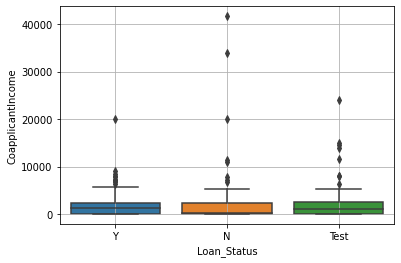

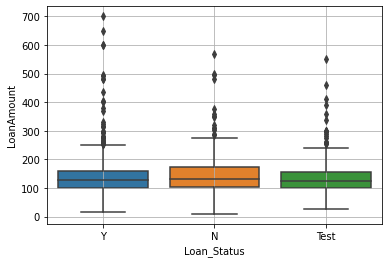

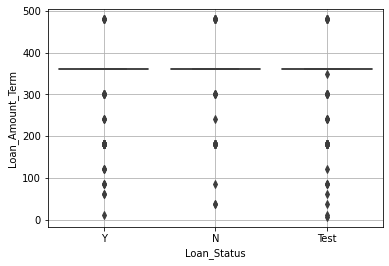

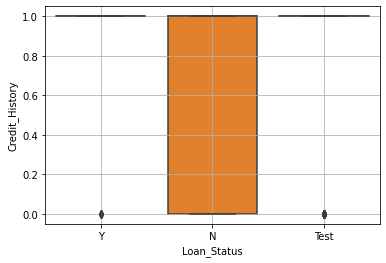

In [18]:
col=df.select_dtypes("float64","int64").columns
for i in df[col]:
    sns.boxplot(data=df,x="Loan_Status",y=df[i])
    plt.grid()
    plt.show()

In [21]:
df["Loan_Status"].value_counts()

Y       422
Test    367
N       192
Name: Loan_Status, dtype: int64

STEP 4: MODEL BUILDING

In [12]:
best_model = LogisticRegression()
best_model.fit(X, Y)
best_model.score(X, Y)

0.8127035830618893

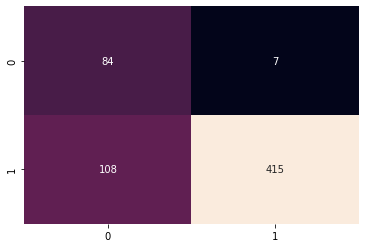

In [13]:
y_pred = best_model.predict(X)
cf = confusion_matrix(y_pred, Y)
sns.heatmap(cf, annot = True, fmt = '.4g', cbar=False);

In [14]:
best_model = KNeighborsClassifier()
best_model.fit(X, Y)
best_model.score(X, Y)

0.8175895765472313

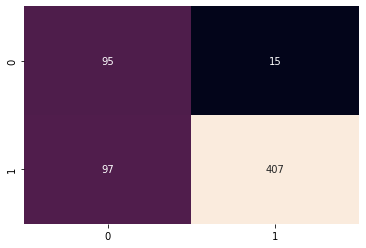

In [15]:
y_pred = best_model.predict(X)
cf = confusion_matrix(y_pred, Y)
sns.heatmap(cf, annot = True, fmt = '.4g', cbar=False);

In [16]:
best_model = DecisionTreeClassifier()
best_model.fit(X, Y)
best_model.score(X, Y)

1.0

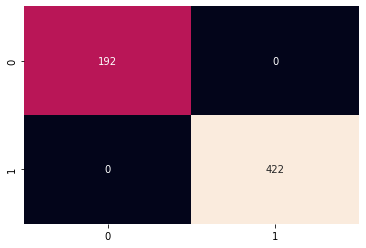

In [17]:
y_pred = best_model.predict(X)
cf = confusion_matrix(y_pred, Y)
sns.heatmap(cf, annot = True, fmt = '.4g', cbar=False);

CONCLUSION:DECISION TREE SERVES AS THE BEST CLASSIFIER WITH A VERY HIGH ACCURACY.